# Defi-IA 2022 <a href="https://www.kaggle.com/c/defi-ia-2022/overview"><img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" style="max-width: 70px; display: inline" alt="Python"/></a>
-------------------------------------------------------------

**Predict the accumulated daily rainfall on ground stations**  
*Quentin Douzery, Alexia Ghozland, Dario Moed*

## <font color = 'royalblue'>1 Imports</font>

### 1.1 Packages

In [1]:
##Packages
import time
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV,train_test_split 
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
from sklearn.preprocessing import scale , StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from keras.models import Sequential

### 1.2 Data

In [2]:
##Données
coords_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Other/stations_coordinates.csv' #Perso
#coords_path = '/home/douzery/Bureau/Defi-IA-2022_Data/Other/stations_coordinates.csv' #INSA
#coords_fname  = '/kaggle/input/defi-ia-2022-test/Other/Other/stations_coordinates.csv'

xtrainS_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Train/X_station_train.csv' #Perso
#xtrainS_path = '/home/douzery/Bureau/Defi-IA-2022_Data/Train/X_station_train.csv' #INSA
#fname = '/kaggle/input/defi-ia-2022-test/Train/Train/X_station_train.csv'

ytrain_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Train/Y_train.csv' #Perso
#ytrain_path = '/home/douzery/Bureau/Defi-IA-2022_Data/Train/Y_train.csv' #INSA
#fname = '/kaggle/input/defi-ia-2022-test/Train/Train/Y_train.csv'

xtestS_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Test/X_station_test.csv' #Perso
#xtrainS_path = '/home/douzery/Bureau/Defi-IA-2022_Data/Train/X_station_train.csv' #INSA

bl_obsT_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Test/Baselines/Baseline_observation_test.csv' #Perso

## <font color = 'royalblue'>2 Récupération des données</font>

In [3]:
##X_train
xtrainS = pd.read_csv(xtrainS_path,parse_dates=['date'],infer_datetime_format=True)
xtrainS['number_sta'] = xtrainS['number_sta'].astype('category')  
display(xtrainS)
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4
...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22


Missing Data : 6899007 
 Shape is : (4409474, 9)


In [4]:
#Y_train
ytrain = pd.read_csv(ytrain_path, parse_dates=['date'], infer_datetime_format=True)
ytrain['number_sta'] = ytrain['number_sta'].astype('category')
display(ytrain)
print('Missing Data :', ytrain.isna().sum().sum(), '\n', 'Shape is :', ytrain.shape)

,date,number_sta,Ground_truth,Id
0,2016-01-02,14066001,3.4,14066001_0
1,2016-01-02,14126001,0.5,14126001_0
2,2016-01-02,14137001,3.4,14137001_0
3,2016-01-02,14216001,4.0,14216001_0
4,2016-01-02,14296001,13.3,14296001_0
...,...,...,...,...
183742,2017-12-31,86137003,5.0,86137003_729
183743,2017-12-31,86165005,3.2,86165005_729
183744,2017-12-31,86272002,1.8,86272002_729
183745,2017-12-31,91200002,1.6,91200002_729


Missing Data : 21640 
 Shape is : (183747, 4)


In [5]:
##X_test
xtestS = pd.read_csv(xtestS_path,infer_datetime_format=True)
display(xtestS)
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,dd,hu,td,t,ff,precip,month,Id
0,NaN,NaN,NaN,278.35,NaN,NaN,12,14047002_277_4
1,NaN,NaN,NaN,278.40,NaN,0.0,12,14047002_277_5
2,NaN,NaN,NaN,279.01,NaN,0.0,12,14047002_277_6
3,NaN,NaN,NaN,279.66,NaN,0.0,12,14047002_277_7
4,NaN,NaN,NaN,279.99,NaN,0.0,12,14047002_277_8
...,...,...,...,...,...,...,...,...
2304797,190.0,82.8,277.00,279.74,10.62,0.0,12,95690001_176_19
2304798,195.0,84.2,277.44,279.93,11.86,0.0,12,95690001_176_20
2304799,199.0,85.7,277.95,280.21,11.77,0.0,12,95690001_176_21
2304800,198.0,85.3,278.25,280.58,10.16,0.0,12,95690001_176_22


Missing Data : 3914287 
 Shape is : (2304802, 8)


In [6]:
bl_obsT = pd.read_csv(bl_obsT_path,infer_datetime_format=True)
Id_pred = bl_obsT["Id"]

## <font color = 'royalblue'>3 Exploration</font>

# Plot precip avec un groupby par mois

# Gérer les outliers

## <font color = 'royalblue'>4 Pré-processing</font>

In [7]:
def Get_StationDay (id):
    return id.split('_')[0] + "_" + id.split('_')[1]

# Prise en compte des mois

In [ ]:
# Variables explicatives : on gère "mode" et "key"
spotifyDum=pd.get_dummies(spotify[['mode','key']])
del spotifyDum['mode_0']
del spotifyDum['key_A']
spotifyDum.head()

### 4.1 Train data

**Remove NaNs**

In [8]:
xtrainS.dropna(inplace=True)
display(xtrainS.head())
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4


Missing Data : 0 
 Shape is : (2264105, 9)


In [9]:
ytrain.dropna(inplace=True)
display(ytrain.head())
print('Missing Data :', ytrain.isna().sum().sum(), '\n', 'Shape is :', ytrain.shape)

,date,number_sta,Ground_truth,Id
0,2016-01-02,14066001,3.4,14066001_0
1,2016-01-02,14126001,0.5,14126001_0
2,2016-01-02,14137001,3.4,14137001_0
3,2016-01-02,14216001,4.0,14216001_0
4,2016-01-02,14296001,13.3,14296001_0


Missing Data : 0 
 Shape is : (162107, 4)


**Create 'StationDay' column**

In [10]:
xtrainS = xtrainS.assign(StationDay=pd.Series(np.zeros(xtrainS.shape[0])).values)
xtrainS.loc[:,"StationDay"] = xtrainS.loc[:,"Id"].apply(Get_StationDay)
display(xtrainS.head())
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id,StationDay
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,14066001_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,14066001_0
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,14066001_0
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,14066001_0
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,14066001_0


Missing Data : 0 
 Shape is : (2264105, 10)


**Drop Useless columns**

In [11]:
xtrainS.drop(['number_sta', 'date', 'Id'], axis=1, inplace=True)
display(xtrainS.head())
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,ff,t,td,hu,dd,precip,StationDay
0,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0
1,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0
2,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0
3,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0
4,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0


Missing Data : 0 
 Shape is : (2264105, 7)


In [12]:
ytrain.drop(['date', 'number_sta'], axis=1, inplace=True)
display(ytrain.head())
print('Missing Data :', ytrain.isna().sum().sum(), '\n', 'Shape is :', ytrain.shape)

,Ground_truth,Id
0,3.4,14066001_0
1,0.5,14126001_0
2,3.4,14137001_0
3,4.0,14216001_0
4,13.3,14296001_0


Missing Data : 0 
 Shape is : (162107, 2)


**Mean on 24 hours (except 'precip')**

In [13]:
xtrainS = xtrainS.groupby("StationDay", as_index=False).agg(pd.Series.sum, min_count = 24)
xtrainS[['dd', 'hu', 'td', 't', 'ff']] = xtrainS[['dd', 'hu', 'td', 't', 'ff']].divide(24)
display(xtrainS.head())
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,StationDay,ff,t,td,hu,dd,precip
0,14066001_0,3.913750,280.333750,278.514583,88.591667,146.500000,0.2
1,14066001_1,8.041250,282.936667,279.997500,82.300000,205.625000,3.4
2,14066001_10,5.408750,279.557917,277.497917,86.750000,209.541667,6.0
3,14066001_100,4.296250,282.112917,277.944583,76.408333,134.958333,11.6
4,14066001_101,1.754583,282.805000,281.003333,88.745833,167.208333,5.6


Missing Data : 58296 
 Shape is : (96009, 7)


**Remove NaNs**

In [14]:
xtrainS.dropna(inplace=True)
display(xtrainS.head())
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,StationDay,ff,t,td,hu,dd,precip
0,14066001_0,3.913750,280.333750,278.514583,88.591667,146.500000,0.2
1,14066001_1,8.041250,282.936667,279.997500,82.300000,205.625000,3.4
2,14066001_10,5.408750,279.557917,277.497917,86.750000,209.541667,6.0
3,14066001_100,4.296250,282.112917,277.944583,76.408333,134.958333,11.6
4,14066001_101,1.754583,282.805000,281.003333,88.745833,167.208333,5.6


Missing Data : 0 
 Shape is : (86293, 7)


**Keep the same rows in X_train and Y_train**

In [15]:
xtrainS = xtrainS.loc[xtrainS['StationDay'].isin(ytrain["Id"])]
display(xtrainS.head())
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,StationDay,ff,t,td,hu,dd,precip
0,14066001_0,3.913750,280.333750,278.514583,88.591667,146.500000,0.2
1,14066001_1,8.041250,282.936667,279.997500,82.300000,205.625000,3.4
2,14066001_10,5.408750,279.557917,277.497917,86.750000,209.541667,6.0
3,14066001_100,4.296250,282.112917,277.944583,76.408333,134.958333,11.6
4,14066001_101,1.754583,282.805000,281.003333,88.745833,167.208333,5.6


Missing Data : 0 
 Shape is : (82120, 7)


In [16]:
ytrain = ytrain.loc[ytrain['Id'].isin(xtrainS["StationDay"])]
display(ytrain.head())
print('Missing Data :', ytrain.isna().sum().sum(), '\n', 'Shape is :', ytrain.shape)

,Ground_truth,Id
0,3.4,14066001_0
3,4.0,14216001_0
7,10.0,14372001_0
11,3.6,14578001_0
14,10.3,14762004_0


Missing Data : 0 
 Shape is : (82120, 2)


**Reset index**

In [17]:
xtrainS.reset_index(drop=True,inplace=True)
display(xtrainS.head())
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,StationDay,ff,t,td,hu,dd,precip
0,14066001_0,3.913750,280.333750,278.514583,88.591667,146.500000,0.2
1,14066001_1,8.041250,282.936667,279.997500,82.300000,205.625000,3.4
2,14066001_10,5.408750,279.557917,277.497917,86.750000,209.541667,6.0
3,14066001_100,4.296250,282.112917,277.944583,76.408333,134.958333,11.6
4,14066001_101,1.754583,282.805000,281.003333,88.745833,167.208333,5.6


Missing Data : 0 
 Shape is : (82120, 7)


In [18]:
ytrain.reset_index(drop=True,inplace=True)
display(ytrain.head())
print('Missing Data :', ytrain.isna().sum().sum(), '\n', 'Shape is :', ytrain.shape)

,Ground_truth,Id
0,3.4,14066001_0
1,4.0,14216001_0
2,10.0,14372001_0
3,3.6,14578001_0
4,10.3,14762004_0


Missing Data : 0 
 Shape is : (82120, 2)


**Drop useless variables**

In [13]:
xtrainS.drop(['StationDay'], axis=1, inplace=True)
display(xtrainS.head())
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,ff,t,td,hu,dd,precip
0,3.05,279.28,277.97,91.4,200.0,0.0
1,2.57,278.76,277.45,91.4,190.0,0.0
2,2.26,278.27,277.02,91.7,181.0,0.0
3,2.62,277.98,276.95,93.0,159.0,0.0
4,2.99,277.32,276.72,95.9,171.0,0.0


Missing Data : 0 
 Shape is : (2264105, 6)


In [14]:
ytrain.drop(['Id'], axis=1, inplace=True)
display(ytrain.head())
print('Missing Data :', ytrain.isna().sum().sum(), '\n', 'Shape is :', ytrain.shape)

,Ground_truth
0,3.4
1,0.5
2,3.4
3,4.0
4,13.3


Missing Data : 0 
 Shape is : (162107, 1)


### 4.2 Test data

In [15]:
def Id_to_int (id):
    return int(id.split('_')[0] + id.split('_')[1] + id.split('_')[2])

**Create 'IntId' column**

In [60]:
xtestS = xtestS.assign(IntId=pd.Series(np.zeros(xtestS.shape[0])).values)
xtestS.loc[:,"IntId"] = xtestS.loc[:,"Id"].apply(Id_to_int)
display(xtestS.head())
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,dd,hu,td,t,ff,precip,month,Id,IntId
0,NaN,NaN,NaN,278.35,NaN,NaN,12,14047002_277_4,140470022774
1,NaN,NaN,NaN,278.40,NaN,0.0,12,14047002_277_5,140470022775
2,NaN,NaN,NaN,279.01,NaN,0.0,12,14047002_277_6,140470022776
3,NaN,NaN,NaN,279.66,NaN,0.0,12,14047002_277_7,140470022777
4,NaN,NaN,NaN,279.99,NaN,0.0,12,14047002_277_8,140470022778


Missing Data : 3914287 
 Shape is : (2304802, 9)


**Sort X_test on 'IntId' values**

In [61]:
xtestS = xtestS.sort_values('IntId', ignore_index=True)
display(xtestS.head())
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,dd,hu,td,t,ff,precip,month,Id,IntId
0,224.0,96.1,277.17,277.75,3.46,0.0,2,14066001_0_0,1406600100
1,216.0,96.7,277.47,277.93,3.65,0.0,2,14066001_0_1,1406600101
2,222.0,97.1,277.03,277.42,3.63,0.0,2,14066001_0_2,1406600102
3,220.0,97.9,277.23,277.54,4.17,0.0,2,14066001_0_3,1406600103
4,215.0,98.0,277.30,277.60,4.03,0.0,2,14066001_0_4,1406600104


Missing Data : 3914287 
 Shape is : (2304802, 9)


**Fill NaNs**

In [62]:
xtestS = xtestS.fillna(method="backfill")
display(xtestS.head())
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,dd,hu,td,t,ff,precip,month,Id,IntId
0,224.0,96.1,277.17,277.75,3.46,0.0,2,14066001_0_0,1406600100
1,216.0,96.7,277.47,277.93,3.65,0.0,2,14066001_0_1,1406600101
2,222.0,97.1,277.03,277.42,3.63,0.0,2,14066001_0_2,1406600102
3,220.0,97.9,277.23,277.54,4.17,0.0,2,14066001_0_3,1406600103
4,215.0,98.0,277.30,277.60,4.03,0.0,2,14066001_0_4,1406600104


Missing Data : 0 
 Shape is : (2304802, 9)


**Create 'StationDay' column**

In [63]:
xtestS = xtestS.assign(StationDay=pd.Series(np.zeros(xtestS.shape[0])).values)
xtestS.loc[:,"StationDay"] = xtestS.loc[:,"Id"].apply(Get_StationDay)
display(xtestS.head())
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,dd,hu,td,t,ff,precip,month,Id,IntId,StationDay
0,224.0,96.1,277.17,277.75,3.46,0.0,2,14066001_0_0,1406600100,14066001_0
1,216.0,96.7,277.47,277.93,3.65,0.0,2,14066001_0_1,1406600101,14066001_0
2,222.0,97.1,277.03,277.42,3.63,0.0,2,14066001_0_2,1406600102,14066001_0
3,220.0,97.9,277.23,277.54,4.17,0.0,2,14066001_0_3,1406600103,14066001_0
4,215.0,98.0,277.30,277.60,4.03,0.0,2,14066001_0_4,1406600104,14066001_0


Missing Data : 0 
 Shape is : (2304802, 10)


**Drop useless variables**

In [64]:
xtestS.drop(['month', 'Id', 'IntId'], axis=1, inplace=True)
display(xtestS.head())
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,dd,hu,td,t,ff,precip,StationDay
0,224.0,96.1,277.17,277.75,3.46,0.0,14066001_0
1,216.0,96.7,277.47,277.93,3.65,0.0,14066001_0
2,222.0,97.1,277.03,277.42,3.63,0.0,14066001_0
3,220.0,97.9,277.23,277.54,4.17,0.0,14066001_0
4,215.0,98.0,277.30,277.60,4.03,0.0,14066001_0


Missing Data : 0 
 Shape is : (2304802, 7)


**Mean on 24 hours (except 'precip')**

In [65]:
xtestS = xtestS.groupby("StationDay", as_index=False).agg(pd.Series.sum, min_count = 24)
xtestS[['dd', 'hu', 'td', 't', 'ff']] = xtestS[['dd', 'hu', 'td', 't', 'ff']].divide(24)
display(xtestS.head())
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,StationDay,dd,hu,td,t,ff,precip
0,14047002_100,183.583333,90.041667,280.165833,282.565000,3.250833,9.9
1,14047002_223,183.583333,90.041667,280.165833,285.415000,3.250833,0.8
2,14047002_236,183.583333,90.041667,280.165833,283.064167,3.250833,7.0
3,14047002_256,183.583333,90.041667,280.165833,283.611250,3.250833,4.0
4,14047002_277,NaN,NaN,NaN,NaN,NaN,NaN


Missing Data : 258 
 Shape is : (96055, 7)


**Remove NaNs**

In [66]:
xtestS.dropna(inplace=True)
display(xtestS.head())
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,StationDay,dd,hu,td,t,ff,precip
0,14047002_100,183.583333,90.041667,280.165833,282.565000,3.250833,9.9
1,14047002_223,183.583333,90.041667,280.165833,285.415000,3.250833,0.8
2,14047002_236,183.583333,90.041667,280.165833,283.064167,3.250833,7.0
3,14047002_256,183.583333,90.041667,280.165833,283.611250,3.250833,4.0
5,14047002_281,183.583333,90.041667,280.165833,282.633750,3.250833,0.0


Missing Data : 0 
 Shape is : (96012, 7)


**Keep the same rows in X_test and Y_test**

In [67]:
xtestS = xtestS.loc[xtestS['StationDay'].isin(bl_obsT["Id"])]
display(xtestS.head())
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,StationDay,dd,hu,td,t,ff,precip
0,14047002_100,183.583333,90.041667,280.165833,282.565000,3.250833,9.9
1,14047002_223,183.583333,90.041667,280.165833,285.415000,3.250833,0.8
2,14047002_236,183.583333,90.041667,280.165833,283.064167,3.250833,7.0
3,14047002_256,183.583333,90.041667,280.165833,283.611250,3.250833,4.0
5,14047002_281,183.583333,90.041667,280.165833,282.633750,3.250833,0.0


Missing Data : 0 
 Shape is : (85140, 7)


**Reset index**

In [68]:
xtestS.reset_index(drop=True,inplace=True)
display(xtestS.head())
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,StationDay,dd,hu,td,t,ff,precip
0,14047002_100,183.583333,90.041667,280.165833,282.565000,3.250833,9.9
1,14047002_223,183.583333,90.041667,280.165833,285.415000,3.250833,0.8
2,14047002_236,183.583333,90.041667,280.165833,283.064167,3.250833,7.0
3,14047002_256,183.583333,90.041667,280.165833,283.611250,3.250833,4.0
4,14047002_281,183.583333,90.041667,280.165833,282.633750,3.250833,0.0


Missing Data : 0 
 Shape is : (85140, 7)


**Sort X_test**

In [69]:
xtestS = xtestS.set_index('StationDay')
xtestS = xtestS.reindex(index=bl_obsT['Id'])
xtestS = xtestS.reset_index()
display(xtestS.head())
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,Id,dd,hu,td,t,ff,precip
0,14066001_149,224.625000,81.720833,279.107917,282.099583,5.237917,1.4
1,14126001_149,163.166667,92.291667,279.718750,280.895833,4.103333,1.0
2,14137001_149,218.458333,83.266667,278.469583,281.167917,5.547083,0.4
3,14216001_149,207.375000,83.345833,278.105417,280.804583,2.667083,0.8
4,14296001_149,191.250000,63.250000,272.062500,279.570417,3.254167,3.6


Missing Data : 0 
 Shape is : (85140, 7)


**Drop useless variables**

In [70]:
xtestS.drop(['Id'], axis=1, inplace=True)
display(xtestS.head())
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,dd,hu,td,t,ff,precip
0,224.625000,81.720833,279.107917,282.099583,5.237917,1.4
1,163.166667,92.291667,279.718750,280.895833,4.103333,1.0
2,218.458333,83.266667,278.469583,281.167917,5.547083,0.4
3,207.375000,83.345833,278.105417,280.804583,2.667083,0.8
4,191.250000,63.250000,272.062500,279.570417,3.254167,3.6


Missing Data : 0 
 Shape is : (85140, 6)


**Rearrange columns order**

In [71]:
xtestS = xtestS[['ff', 't', 'td', 'hu', 'dd', 'precip']]
display(xtestS.head())
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,ff,t,td,hu,dd,precip
0,5.237917,282.099583,279.107917,81.720833,224.625000,1.4
1,4.103333,280.895833,279.718750,92.291667,163.166667,1.0
2,5.547083,281.167917,278.469583,83.266667,218.458333,0.4
3,2.667083,280.804583,278.105417,83.345833,207.375000,0.8
4,3.254167,279.570417,272.062500,63.250000,191.250000,3.6


Missing Data : 0 
 Shape is : (85140, 6)


## <font color = 'royalblue'>5 Training</font>

### 5.1 Metrics

In [192]:
def MAPE(ypred, ytrue):
    aux = abs((ytrue-ypred)/ytrue)
    return 100*aux.mean(axis=0)

### 5.2 Normalization

In [203]:
def normalization(x_train, x_test):
    #Calcul de la moyenne et de la variance de l'échantillon train
    mean = x_train.mean()
    std  = x_train.std()
    
    #Normalisation
    x_train = (x_train - mean) / std
    x_test  = (x_test  - mean) / std

    #Mise en forme
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    return x_train, x_test

In [ ]:
xtrainS_N, xtestS_N = normalization(xtrainS, xtestS)

### 5.3 Build model

In [16]:
def get_model(shape, n_layers, n_neurons): 
    #shape : nb de variables explicatives 
    #n_layers : nb de couches
    #n_neurons : neurons/couche
   
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape))
    
    for i in range(n_layers): 
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
   
    model.add(keras.layers.Dense(1, name='Output'))
    model.compile(optimizer = 'adam', 
                  loss      = 'mse')
                  #metrics   = ["mean_squared_error"])
    return model

In [299]:
#Paramètres du réseau
nb_variables = np.shape(xtrainS_N)[1]
n_layers = 20
n_neurons = 32

#Build the network
NN = get_model(nb_variables, n_layers, n_neurons)

#Print the network
NN.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_532 (Dense)            (None, 32)                224       
_________________________________________________________________
dense_533 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_534 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_535 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_536 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_537 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_538 (Dense)            (None, 32)              

### 5.4 Train model

Epoch 1/10
822/822 [==============================] - 5s 5ms/step - loss: 16.7718
Epoch 2/10
822/822 [==============================] - 2s 3ms/step - loss: 15.6366
Epoch 3/10
822/822 [==============================] - 2s 3ms/step - loss: 15.4459
Epoch 4/10
822/822 [==============================] - 2s 3ms/step - loss: 15.7027
Epoch 5/10
822/822 [==============================] - 3s 3ms/step - loss: 15.5181
Epoch 6/10
822/822 [==============================] - 3s 4ms/step - loss: 15.1178
Epoch 7/10
822/822 [==============================] - 3s 4ms/step - loss: 15.6397
Epoch 8/10
822/822 [==============================] - 2s 3ms/step - loss: 14.9393
Epoch 9/10
822/822 [==============================] - 3s 3ms/step - loss: 15.1534
Epoch 10/10
822/822 [==============================] - 2s 3ms/step - loss: 15.1702


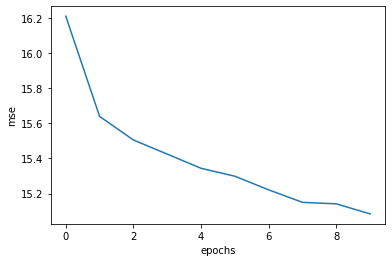

In [300]:
#Paramètres d'apprentissage
batch_size = 100
epochs = 10

#Entraînement
history = NN.fit(xtrainS_N, ytrain, batch_size, epochs, verbose=1)

#Affichage de l'évolution de la MSE
plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("mse")
plt.show()

## <font color = 'royalblue'>6 Validation</font>

### 6.1 Sampling

In [247]:
def Create_samples (xtrain, ytrain):
    #Split X validation/train 
    xtrain_v = xtrain.sample(frac=0.20, axis=0)
    xtrain_t = xtrain.drop(xtrain_v.index)
    
    #Split Y validation/train
    ytrain_v = ytrain.loc[ytrain['Id'].isin(xtrain_v['StationDay'])]
    ytrain_t = ytrain.drop(ytrain_v.index)
    
    #Reset index
    xtrain_t.reset_index(drop=True, inplace=True)
    xtrain_v.reset_index(drop=True, inplace=True)
    ytrain_t.reset_index(drop=True, inplace=True)
    ytrain_v.reset_index(drop=True, inplace=True)
    
    #Sort X
    xtrain_t = xtrain_t.set_index('StationDay')
    xtrain_t = xtrain_t.reindex(index=ytrain_t['Id'])
    xtrain_t = xtrain_t.reset_index()
    
    xtrain_v = xtrain_v.set_index('StationDay')
    xtrain_v = xtrain_v.reindex(index=ytrain_v['Id'])
    xtrain_v = xtrain_v.reset_index()
    
    #Drop useless variables
    xtrain_t.drop(['Id'], axis=1, inplace=True)
    xtrain_v.drop(['Id'], axis=1, inplace=True)
    ytrain_t.drop(['Id'], axis=1, inplace=True)
    ytrain_v.drop(['Id'], axis=1, inplace=True)
    
    return xtrain_t, xtrain_v, ytrain_t, ytrain_v

### 6.2 Monte Carlo validation

In [277]:
B = 20
MAPE_ = np.zeros(B)

for b in range(B):
    print(b)
    xtrain_t, xtrain_v, ytrain_t, ytrain_v = Create_samples(xtrainS, ytrain)
    xtrain_t_N, xtrain_v_N = normalization(xtrain_t, xtrain_v)
    ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1
    
    nb_variables = np.shape(xtrain_t_N)[1]
    nn = get_model(nb_variables, n_layers, n_neurons)
    
    #Entraînement
    history = nn.fit(xtrain_t_N, ytrain_t, batch_size, epochs, verbose=0)
    
    validation = nn.predict(xtrain_v_N)
    Network_validation = ytrain_v.copy()
    Network_validation['Ground_truth'] = validation
    Network_validation.rename(columns={'Ground_truth':'Prediction'}, inplace=True)

    Network_validation['Prediction'] = Network_validation['Prediction'] + 1
    
    MAPE_[b] = MAPE(Network_validation['Prediction'], ytrain_v['Ground_truth'])

0


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


1


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


2


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


3


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


4


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


5


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


6


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


7


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


8


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


9


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


10


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


11


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


12


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


13


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


14


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


15


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


16


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


17


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


18


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


19


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-277-9132cf5f7d3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain_v['Ground_truth'] = ytrain_v['Ground_truth'] + 1


107.04619554172055


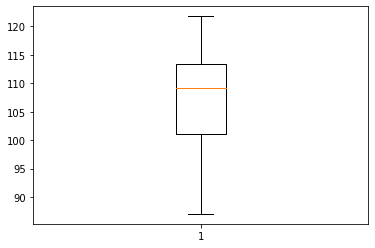

In [278]:
print("Mean MAPE :", np.mean(MAPE_))
plt.boxplot(MAPE_)
plt.ylabel("MAPE")
plt.show()

## <font color = 'royalblue'>7 Prediction</font>

In [304]:
predictions_network = NN.predict(xtestS_N)
Network_predictions = bl_obsT.copy()
Network_predictions["Prediction"] = predictions_network
display(Network_predictions.head())

,Id,Prediction
0,14066001_149,4.733438
1,14126001_149,2.777220
2,14137001_149,5.007422
3,14216001_149,3.151839
4,14296001_149,1.288736


## <font color = 'royalblue'>8 Post-processing</font>

In [305]:
Network_predictions["Prediction"] = Network_predictions["Prediction"] + 1
display(Network_predictions.head())
print('Missing Data :', Network_predictions.isna().sum().sum(), '\n', 'Shape is :', Network_predictions.shape)

,Id,Prediction
0,14066001_149,5.733438
1,14126001_149,3.777220
2,14137001_149,6.007422
3,14216001_149,4.151839
4,14296001_149,2.288736


Missing Data : 0 
 Shape is : (85140, 2)


## <font color = 'royalblue'>9 Exportation</font>

In [306]:
output_file = "Submissions_9_ANN-20x32.csv"
Network_predictions.to_csv('/Users/qdouzery/Desktop/Defi-IA-2022_DGM/Submissions/' + output_file, index=False)